# Credit Card Fraud Detection Dataset

#### The dataset consists of a column 'Class' having 2 values 
        '0' => Normal
        '1' => Fraudulent 
#### data. here we have to predict wether the transactions are fraudulent or normal.
#### It is basically an Anomaly detection problem for which I will be using Algorithms like DBSCAN, Isilation forest and Local outlier factor.


* Before applying the algorithms we need to :
    1. Read the data 
    2. Clean the data
    3. Visualise the data
    4. Normalise the data
    5. Train diffrent models
    6. Tunning of different models 
    7. Comparing the different models
   


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

In [24]:
df = pd.read_csv("creditcard.csv")

In [25]:
df.shape[0]

284807

# Data Visualisation

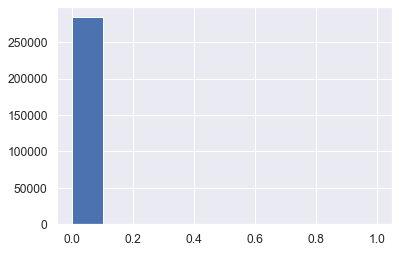

In [26]:
df['Class'].hist()

In [29]:
outlier_count = df[df['Class'] == 1]['Class'].count()
non_outlier_count = df[df['Class'] == 0]['Class'].count()
outlier_count=(outlier_count/non_outlier_count)
outlier_count

0.0017304750013189597

* This Shows the data is Highly imbalanced 

In [5]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_style("darkgrid")

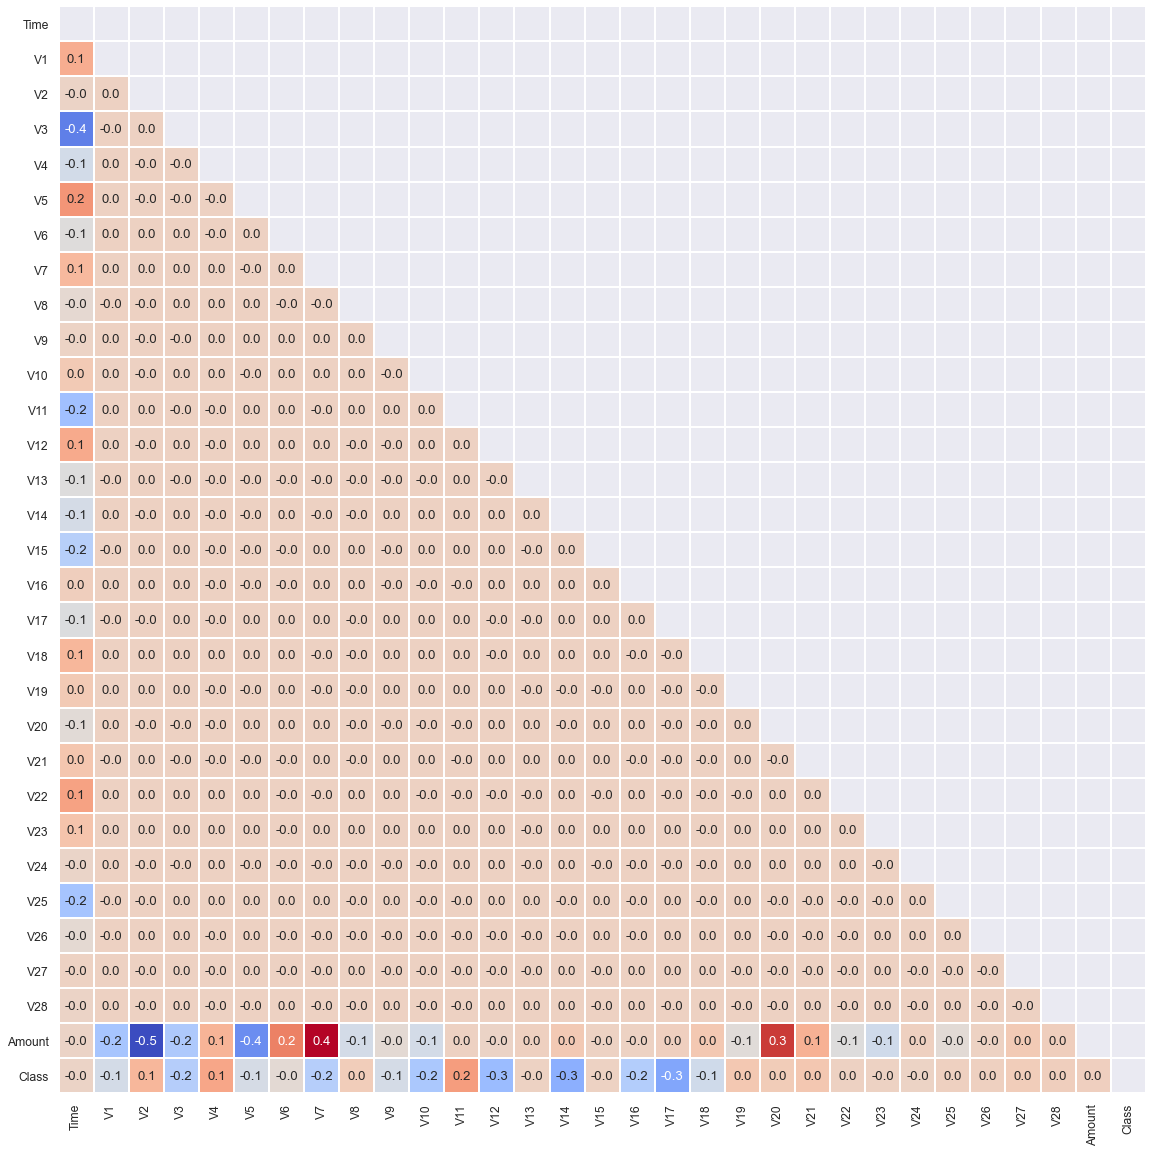

In [6]:
# Display numerical correlations (pearson) between features on heatmap.

sns.set(font_scale=1.1)
correlation_train = df.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

* we can see the correlation between the columns is very low, all the features are almost independent.

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Normalisation Of data

In [11]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 

In [12]:

Y = df['Class'].reset_index(drop=True)
X = df.drop(['Class'], axis=1)


In [13]:

# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

In [14]:
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X = normalize(X) 

In [15]:
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(X) 

In [16]:
from sklearn.decomposition import PCA 

In [17]:

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0  0.704839 -0.003395
1  0.644905  0.003421
2  0.417365 -0.065075
3  0.366049 -0.205170
4  0.356758  0.177501


In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_principal)
y_kmeans = kmeans.predict(X_principal)

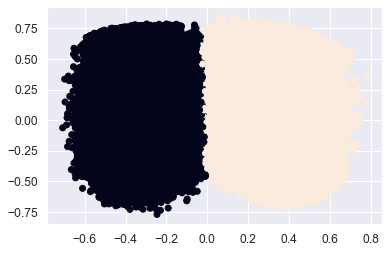

In [17]:
plt.scatter(X_principal['P1'], X_principal['P2'], c=y_kmeans)

# DBSCAN

### Finding Value of EPS using Nearest Neighbours

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. 

The point itself is included in n_neighbors. 

The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [18]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

In [19]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)

In [20]:
distances, indices = nbrs.kneighbors(X)

In [21]:
distances[:5]

array([[0.        , 0.48332198],
       [0.        , 0.07312593],
       [0.        , 0.38116751],
       [0.        , 0.27711098],
       [0.        , 0.57037201]])

In [22]:
indices[:5]

array([[    0, 41901],
       [    1,  3906],
       [    2, 93003],
       [    3, 44225],
       [    4, 38451]], dtype=int64)

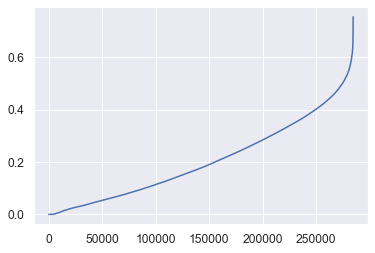

In [23]:
# Sort the distances and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Number of clusters: 15250
Outliers : 191807


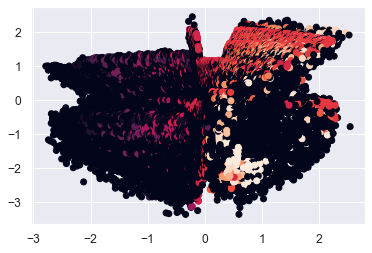

In [41]:
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.555, min_samples=2).fit_predict(X)

print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred)

Number of clusters: 15422
Outliers : 188554


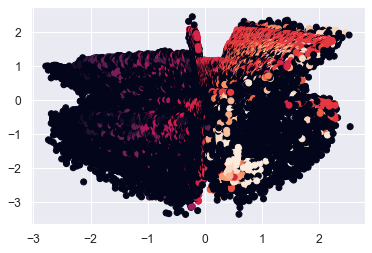

In [42]:
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.58, min_samples=2).fit_predict(X)

print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [26]:
print('Homogeneity: {}'.format(metrics.homogeneity_score(Y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(Y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(Y, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(Y, y_pred))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(Y, y_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, Y))

Homogeneity: 0.25243219564215974
Completeness: 0.0010258537611579038
V-measure: 0.002
Adjusted Rand Index: -0.000
Adjusted Mutual Information: 0.001
Silhouette Coefficient: 0.039


### Drop using DBSCAN as it is going to take large amount of time for tuning the model as the data is 

# Isolation Forest

In [27]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report, accuracy_score

In [28]:
model=IsolationForest(max_samples = len(X),contamination = outlier_count)
model.fit(X)

IsolationForest(contamination=0.001727485630620034, max_samples=284807)

In [29]:
scores=model.decision_function(X)
predictions=model.predict(X)
predictions[predictions==1]=0

predictions[predictions==-1]=1

In [30]:
loss = (predictions != Y).sum() 

In [31]:
print('loss',loss)
print('Accuracy',accuracy_score(predictions,Y))

loss 962
Accuracy 0.9966222740311861


In [32]:

print(classification_report(predictions,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.02      0.02      0.02       492

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807



# Local Outlier Factor

In [33]:

from sklearn.neighbors import LocalOutlierFactor

In [34]:
model2 = LocalOutlierFactor(n_neighbors = 20,contamination = outlier_count)


In [35]:
prediction2 = model2.fit_predict(X)

In [36]:
prediction2[prediction2 == 1] = 0
prediction2[prediction2 == -1] = 1

In [37]:
loss2 = (prediction2 != Y).sum()

In [38]:
accuracy2 = accuracy_score(prediction2,Y)

In [39]:
print('loss',loss2)
print('Accuracy',accuracy2)

loss 984
Accuracy 0.9965450287387599


In [40]:

print(classification_report(prediction2,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

